In [1]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [2]:
import numpy as np
from scipy.spatial import KDTree

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import pickle

from collections import defaultdict
from copy import deepcopy
from heapq import *

from gPRM import gPRM

In [3]:
g = open("data-4_19_20.pkl","rb")
loaded_output_file = pickle.load(g)
g.close()

In [4]:
data = loaded_output_file

In [54]:
data[2][100].keys()

dict_keys([1, 2, 3])

In [ ]:
data[2][1000][3]

# key structure goes D, n, r

In [5]:
# make a pandas dataframe for seaborn

arrays_for_dataframe = []

for D in data.keys():
    for n in data[D].keys():
        for r in data[D][n].keys():
            for error in data[D][n][r]:
                arrays_for_dataframe.append([D, n, r, error])

In [39]:
data[3][1000][1]

array([0.05526531, 0.10132149, 0.05937859, 0.05152741, 0.07090142,
       0.09067017, 0.04109898, 0.06659012, 0.09330714, 0.08443729,
       0.05615322, 0.04440948, 0.07767259, 0.05051745, 0.05512746,
       0.03955799, 0.05776512, 0.09945627, 0.04798146, 0.0837568 ,
       0.03214722, 0.08840524, 0.05842817, 0.07469746, 0.06493727,
       0.07692409, 0.06016665, 0.06421059, 0.05529573, 0.05104943,
       0.03611281, 0.05918341, 0.08425806, 0.07520802, 0.02842611,
       0.07486304, 0.0313574 , 0.0631174 , 0.06940619, 0.07712391,
       0.07948481, 0.05291565, 0.03910373, 0.03635206, 0.05403744,
       0.0478868 , 0.08612864, 0.054837  , 0.07204264, 0.059115  ])

In [40]:
data[3][1000][2]

array([0.00583614, 0.00966992, 0.01138928, 0.00620223, 0.00879299,
       0.01184199, 0.00814348, 0.01062655, 0.01074042, 0.01034715,
       0.01009328, 0.00525914, 0.00768851, 0.006212  , 0.00572929,
       0.00673784, 0.00438261, 0.01783325, 0.01505105, 0.00506779,
       0.00098323, 0.00895295, 0.01178197, 0.00518006, 0.00549637,
       0.01022739, 0.01854852, 0.01326227, 0.00497945, 0.01073861,
       0.00592648, 0.00873113, 0.01529849, 0.00524703, 0.01345929,
       0.00972109, 0.00403122, 0.00128673, 0.00691698, 0.01747479,
       0.00963635, 0.0073368 , 0.00411463, 0.00657906, 0.01376532,
       0.00597923, 0.00994843, 0.00709235, 0.01546907, 0.01175771])

In [42]:
data[3][1000][3]

array([0.00126878, 0.00187315, 0.00487608, 0.00205342, 0.00421079,
       0.00339181, 0.00480991, 0.00487448, 0.00233634, 0.00382788,
       0.00565276, 0.00097013, 0.00464586, 0.00155868, 0.00127841,
       0.00247066, 0.00210039, 0.00319026, 0.00221535, 0.00381684,
       0.00098323, 0.00477474, 0.00179943, 0.00159201, 0.00163218,
       0.0006443 , 0.0056726 , 0.00403712, 0.00307878, 0.00205639,
       0.00136071, 0.00611879, 0.00335065, 0.00210259, 0.00481315,
       0.00233455, 0.00033698, 0.00065841, 0.00283718, 0.00479666,
       0.0006195 , 0.00446731, 0.0023217 , 0.00218371, 0.00278957,
       0.00250311, 0.00355986, 0.00317609, 0.00150016, 0.0002173 ])

In [6]:
df = pd.DataFrame(arrays_for_dataframe)

In [7]:
df.columns = ['D', 'n', 'r', 'relative_error']

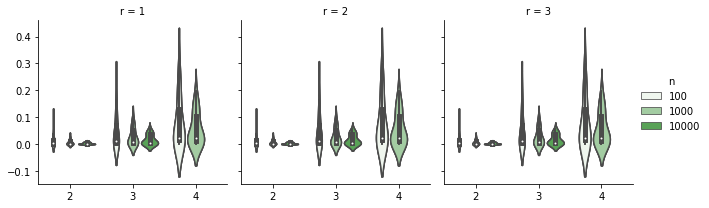

In [58]:
plot = sns.FacetGrid(df, col='r', hue='n', palette='Set1', legend_out=True)
plot.map(sns.violinplot, x=df['D'], y=df['relative_error'], hue = df['n'], bw=0.7)
plot.add_legend()

ValueError: Axes instance argument was not found in a figure

In [ ]:
random_data_1 = np.random.random(size=50)*10
random_data_2 = np.random.random(size=50)*12

In [ ]:
combined_random_data = []
for i in range(len(random_data_1)):
    combined_random_data.append([random_data_1[i], 10])
for j in range(len(random_data_2)):
    combined_random_data.append([random_data_2[j], 12])

In [ ]:
df = pd.DataFrame(combined_random_data)

In [ ]:
df.columns = ['value', 'parameter']

In [ ]:
choices = ['yes', 'no', 'maybe']
do_i_care = []
for i in range(100):
    do_i_care.append(np.random.choice(choices))

In [ ]:
df['importance'] = do_i_care

In [ ]:
sns.set(style='whitegrid')
sns.violinplot(data=df, x='parameter', y='value', hue='importance')